In [11]:
import os
import statistics
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np

In [12]:
base_directory = 'output_tournament_07/0.05_0.6_100_100/'  

# CREATE TABLE FITNESS

In [2]:
def get_data_execution(path_base):
    list_best_fitness = []
    list_mean_fitness = []
    
    for i in range(10):
        exec_dir = os.path.join(path_base, f'execution_{i}')
        if os.path.exists(exec_dir):
            fitness_file = os.path.join(exec_dir, 'data_fitness.txt')
            if os.path.exists(fitness_file):
                with open(fitness_file, 'r') as file:
                    linha = file.readline().strip()
                    try:
                        best_fitness, mean_fitness, stdev_fitness = map(float, linha.split())
                        list_best_fitness.append(best_fitness)
                        list_mean_fitness.append(mean_fitness)
                    except ValueError:
                        print(f"Erro ao ler valores no arquivo {fitness_file}. Verifique o formato.")
            else:
                print(f'Arquivo {fitness_file} não encontrado na execução {i}.')
        else:
            print(f'Pasta {exec_dir} não encontrada.')
          
    if list_best_fitness:
        mean_best_fitness = statistics.mean(list_best_fitness)
        stdev_best_fitness = statistics.stdev(list_best_fitness)
    
    if list_mean_fitness:
        mean_all_fitness = statistics.mean(list_mean_fitness)
        stdev_fitness = statistics.stdev(list_mean_fitness)
        
    return mean_best_fitness, stdev_best_fitness, mean_all_fitness, stdev_fitness
        

In [7]:
if __name__ == '__main__':
    prob_mutation_values=[0.01, 0.05, 0.1]
    prob_crossing_values=[0.6, 0.8, 1]
    n_pop_values=[25, 50, 100]
    n_gen_values=[400, 200, 100]
    method = 'roulette'
    dataset = {'Taxa de Cruzamento': [], 'Taxa de Mutação': [], 'Tamanho da População': [], 
               'Número de Gerações': [], 'Melhor Aptidão - Média': [], 'Melhor Aptidão - Desvio Padrão': [],
               'Aptidão Média - Média': [], 'Aptidão Média - Desvio Padrão': []}
    for mutation in prob_mutation_values:
        for crossing in prob_crossing_values:
            for i in range(len(n_pop_values)):
                path_base = f'output_{method}_07/{mutation}_{crossing}_{n_pop_values[i]}_{n_gen_values[i]}'
                mean_best_fitness, stdev_best_fitness, mean_all_fitness, stdev_fitness = get_data_execution(path_base)
                dataset['Taxa de Cruzamento'].append(crossing)
                dataset['Taxa de Mutação'].append(mutation)
                dataset['Tamanho da População'].append(n_pop_values[i])
                dataset['Número de Gerações'].append(n_gen_values[i])
                dataset['Melhor Aptidão - Média'].append(mean_best_fitness)
                dataset['Melhor Aptidão - Desvio Padrão'].append(stdev_best_fitness)
                dataset['Aptidão Média - Média'].append(mean_all_fitness)
                dataset['Aptidão Média - Desvio Padrão'].append(stdev_fitness)
    

In [8]:
df = pd.DataFrame(dataset)
df.head(5)

,Taxa de Cruzamento,Taxa de Mutação,Tamanho da População,Número de Gerações,Melhor Aptidão - Média,Melhor Aptidão - Desvio Padrão,Aptidão Média - Média,Aptidão Média - Desvio Padrão
0,0.6,0.01,25,400,1448.9,6.674162,-1698.6625,4022.913371
1,0.6,0.01,50,200,1451.3,4.877385,-8982.0420,7696.404277
2,0.6,0.01,100,100,1454.5,4.403282,-7524.7930,4347.795152
3,0.8,0.01,25,400,1447.1,4.954235,-4752.9875,5659.212719
4,0.8,0.01,50,200,1454.5,2.877113,-5202.6800,5207.187102


In [9]:
df_sorted = df.sort_values(by='Melhor Aptidão - Média', ascending=False)
df_sorted.head(5)

,Taxa de Cruzamento,Taxa de Mutação,Tamanho da População,Número de Gerações,Melhor Aptidão - Média,Melhor Aptidão - Desvio Padrão,Aptidão Média - Média,Aptidão Média - Desvio Padrão
21,0.8,0.10,25,400,1457.2,1.686548,-44377.708333,26363.130664
12,0.8,0.05,25,400,1456.7,1.636392,-28395.204167,15493.798910
13,0.8,0.05,50,200,1456.6,2.270585,-16939.638000,13663.261374
25,1.0,0.10,50,200,1456.5,2.415229,-45818.966000,23074.407145
24,1.0,0.10,25,400,1456.4,2.221111,-28494.320833,18326.034608


In [10]:
df_sorted.to_csv(f'output_{method}_07/table_fitness_{method}.csv')

# CREATE GRAPHICS

In [13]:
def read_data_fitness(directory):
    generations = []
    best_fitness = []
    worst_fitness = []
    mean_fitness = []
    median_fitness = []

    file_path = os.path.join(directory, 'data_generation.txt')

    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            for line in file:
                parts = line.split()
                generation = int(parts[0])  # generation
                best = float(parts[1])  # best fitness
                worst = float(parts[2])  # worst fitness
                mean = float(parts[3])  # mean fitness
                median = float(parts[4])  # median fitness

                generations.append(generation)
                best_fitness.append(best)
                worst_fitness.append(worst)
                mean_fitness.append(mean)
                median_fitness.append(median)
    
    return generations, best_fitness, worst_fitness, mean_fitness, median_fitness



In [14]:
def plot_fitness_evolution(base_dir, num_executions=10):
    plt.figure(figsize=(10, 6))  
    for execution_num in range(num_executions):
        execution_dir = os.path.join(base_dir, f'execution_{execution_num}')
        generations, best_fitness, _, _, _ = read_data_fitness(execution_dir)
        plt.plot(generations, best_fitness, label=f'Execution {execution_num}')

    plt.title('Evolução do Melhor Fitness por Geração')
    plt.xlabel('Geração')
    plt.ylabel('Melhor Fitness')
    plt.legend()
    plt.show()

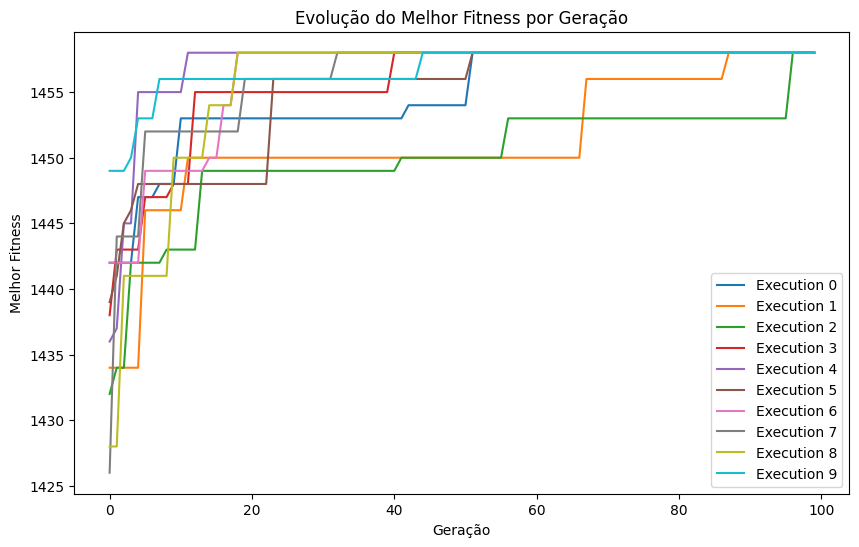

In [15]:
plot_fitness_evolution(base_directory, num_executions=10)

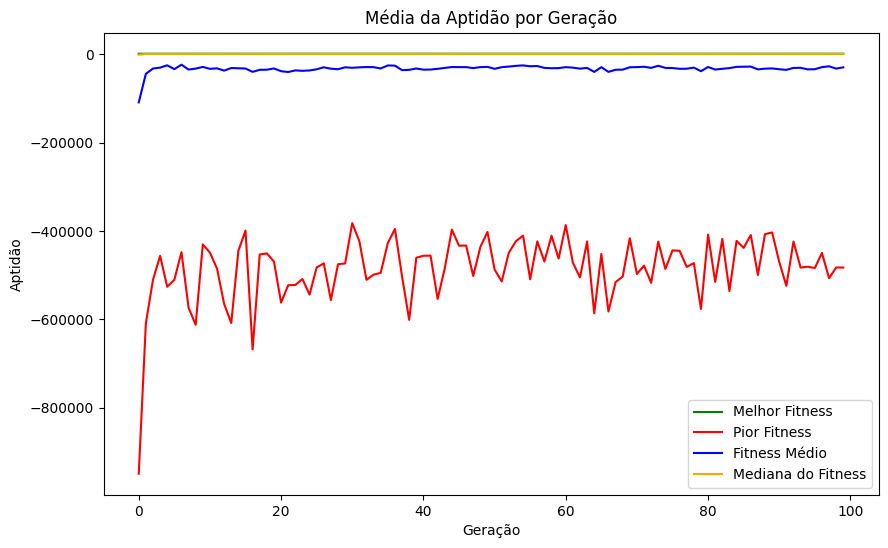

In [17]:
def calculate_values_by_generation(base_dir, num_executions=10):
    all_best_fitness = []
    all_worst_fitness = []
    all_mean_fitness = []
    all_median_fitness = []

    for execution_num in range(num_executions):
        execution_dir = os.path.join(base_dir, f'execution_{execution_num}')
        generations, best, worst, mean, median = read_data_fitness(execution_dir)
        all_best_fitness.append(best)
        all_worst_fitness.append(worst)
        all_mean_fitness.append(mean)
        all_median_fitness.append(median)

    avg_best_fitness = np.mean(all_best_fitness, axis=0)
    avg_worst_fitness = np.mean(all_worst_fitness, axis=0)
    avg_mean_fitness = np.mean(all_mean_fitness, axis=0)
    avg_median_fitness = np.mean(all_median_fitness, axis=0)

    return generations, avg_best_fitness, avg_worst_fitness, avg_mean_fitness, avg_median_fitness

def plot_fitness_averages(base_dir, num_executions=10):
    generations, avg_best_fitness, avg_worst_fitness, avg_mean_fitness, avg_median_fitness = calculate_values_by_generation(base_dir, num_executions)

    plt.figure(figsize=(10, 6))  
    plt.plot(generations, avg_best_fitness, label='Melhor Fitness', color='g')
    plt.plot(generations, avg_worst_fitness, label='Pior Fitness', color='r')
    plt.plot(generations, avg_mean_fitness, label='Fitness Médio', color='b')
    plt.plot(generations, avg_median_fitness, label='Mediana do Fitness', color='orange') 
    plt.title('Média da Aptidão por Geração')
    plt.xlabel('Geração')
    plt.ylabel('Aptidão')
    plt.legend()
    plt.show()

plot_fitness_averages(base_directory, num_executions=10)
